In [1]:
import gym

In [2]:
env = gym.make('BipedalWalker-v3')

C:\Users\Dell\Documents\ML\RL_env\lib\site-packages\gym\logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [3]:
env.reset()

array([ 2.74746632e-03, -9.25509608e-06,  7.19953123e-04, -1.59999382e-02,
        9.20229107e-02, -9.50089074e-04,  8.60233009e-01,  2.10515829e-03,
        1.00000000e+00,  3.24274413e-02, -9.50024580e-04,  8.53783756e-01,
        6.71912606e-04,  1.00000000e+00,  4.40814018e-01,  4.45820123e-01,
        4.61422771e-01,  4.89550203e-01,  5.34102798e-01,  6.02461040e-01,
        7.09148884e-01,  8.85931849e-01,  1.00000000e+00,  1.00000000e+00])

In [4]:
env.action_space

Box(4,)

In [5]:
env.observation_space.shape

(24,)

In [ ]:
done = True
for step in range(5000):
    if done:
        state = env.reset()
    new_state, reward, done , info = env.step(env.action_space.sample())
    env.render()
env.close()

In [6]:
env.reset()

array([ 2.74509005e-03,  1.51788548e-05, -1.97924986e-03, -1.60001028e-02,
        9.26394165e-02,  4.59470693e-03,  8.59625742e-01, -2.25084182e-03,
        1.00000000e+00,  3.29170860e-02,  4.59452672e-03,  8.53454068e-01,
       -3.12626300e-03,  1.00000000e+00,  4.40813303e-01,  4.45819408e-01,
        4.61422026e-01,  4.89549398e-01,  5.34101903e-01,  6.02460027e-01,
        7.09147751e-01,  8.85930359e-01,  1.00000000e+00,  1.00000000e+00])

In [7]:
from stable_baselines3 import PPO
from stable_baselines3.common.callbacks import EvalCallback
import matplotlib.pyplot as plt
from gym.wrappers import Monitor

In [8]:
def training(learning_rate, total_timesteps, model_name):
    
    #train the model
    env = gym.make('BipedalWalker-v3')
    model = PPO('MlpPolicy', env=env, learning_rate=learning_rate, verbose=1)

    eval_env = gym.make('BipedalWalker-v3')
    eval_callback = EvalCallback(eval_env=eval_env, best_model_save_path='./train',log_path='./logs', eval_freq=10000, n_eval_episodes=50, deterministic=True, render=False)
    
    model.learn(total_timesteps=total_timesteps, callback=eval_callback)
    model.save(model_name)
    env.close()
    
    return model

In [9]:
def test_model(model, env, episodes = 100):
    total_rewards = []
    for epi in range(episodes):
        obs = env.reset()
        episode_reward = 0
        done = False

    while not done:
        action, _ = model.predict(obs, deterministic = True)
        obs, reward, done, info = env.step(action)
        episode_reward += reward
    total_rewards.append(episode_reward)
    average_reward = sum(total_rewards) / episodes
    return average_reward

In [10]:
def plot_learning_rates_accuracy(learning_rates, rewards):
    plt.figure(figsize=(10,6))
    plt.plot(learning_rates, rewards, marker='o')
    plt.xlabel('Learning rate')
    plt.ylabel('Average Reward')
    plt.title('Average Reward vs. Learning Rate')
    plt.grid(True)
    plt.show()

In [11]:
def choose_best_model(learning_rates, rewards, model_names):
    optimal_lr = learning_rates[rewards.index(max(rewards))]
    best_model_name = model_names[rewards.index(max(rewards))]

    final_model_name = f"PPO_final_lr_{optimal_lr}"
    best_model = PPO.load(best_model_name)
    best_model.set_env(gym.make('BipedalWalker-v3'))
    best_model.learn(total_timesteps = 500000)
    best_model.save(final_model_name)
    
    return final_model_name

In [14]:
def compare_learning_rates():

    learning_rates = [0.0001, 0.001, 0.01, 0.1]
    rewards = []
    model_names = []

    for lr in learning_rates:
        model_name = f'PPO_lr_{lr}'
        model = training(learning_rate=lr, total_timesteps=500000, model_name=model_name)
        env = gym.make('BipedalWalker-v3')
        avg_rewards = test_model(model, env, episodes = 100)
        rewards.append(avg_rewards)
        model_names.append(model_name)
        env.close()
    return learning_rates, rewards, model_names

In [15]:
learning_rates, rewards, model_names = compare_learning_rates()

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 850      |
|    ep_rew_mean     | -107     |
| time/              |          |
|    fps             | 1067     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 2048     |
---------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 290          |
|    ep_rew_mean          | -110         |
| time/                   |              |
|    fps                  | 765          |
|    iterations           | 2            |
|    time_elapsed         | 5            |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0063556954 |
|    clip_fraction        | 0.0424       |
|    clip_range           | 0.2          |
|    en

C:\Users\Dell\Documents\ML\RL_env\lib\site-packages\stable_baselines3\common\evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=10000, episode_reward=-102.71 +/- 2.67
Episode length: 189.20 +/- 41.86
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 189         |
|    mean_reward          | -103        |
| time/                   |             |
|    total_timesteps      | 10000       |
| train/                  |             |
|    approx_kl            | 0.004124113 |
|    clip_fraction        | 0.00513     |
|    clip_range           | 0.2         |
|    entropy_loss         | -5.66       |
|    explained_variance   | 0.0436      |
|    learning_rate        | 0.0001      |
|    loss                 | 161         |
|    n_updates            | 40          |
|    policy_gradient_loss | -0.00442    |
|    std                  | 0.996       |
|    value_loss           | 164         |
-----------------------------------------
New best mean reward!
---------------------------------
| rollout/           |          |
|    ep_len_mean     

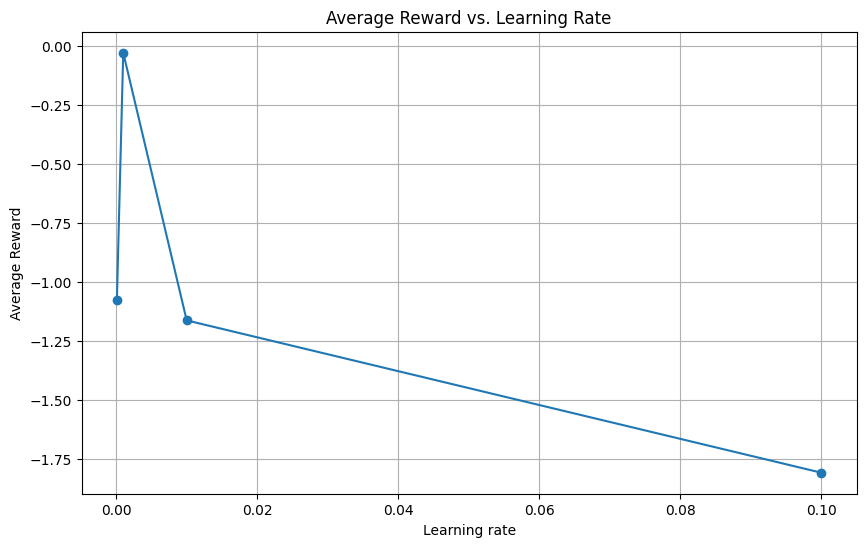

In [16]:
plot_learning_rates_accuracy(learning_rates, rewards)

In [20]:
rewards

[-1.075900579274421,
 -0.027815887386053218,
 -1.1618899449207325,
 -1.807234443005899]

In [17]:
final_model_name = choose_best_model(learning_rates, rewards, model_names)

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.6e+03  |
|    ep_rew_mean     | 244      |
| time/              |          |
|    fps             | 391      |
|    iterations      | 1        |
|    time_elapsed    | 5        |
|    total_timesteps | 2048     |
---------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1.38e+03   |
|    ep_rew_mean          | 154        |
| time/                   |            |
|    fps                  | 284        |
|    iterations           | 2          |
|    time_elapsed         | 14         |
|    total_timesteps      | 4096       |
| train/                  |            |
|    approx_kl            | 0.11559306 |
|    clip_fraction        | 0.553      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.895     |
|    expl

In [18]:
model = PPO.load(final_model_name)

In [ ]:
state = env.reset()

while True:
    action, _ = model.predict(state)
    state, reward, done, info = env.step(action)
    env.render()

In [21]:
model.save("PPO_BipedalWalker")

In [23]:
with open("PPO_evaluation_results.txt", "w") as f:
    f.write(f"{rewards[1]}")